In [22]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.metrics import mean_squared_error
import seaborn as sns

from pipelines import benchmark_pipelines, pipelines
from source import read_preprocessed_data
from transform import load_process_and_store_spreadsheets, survival_histograms
from views import view_as_exponential

In [2]:
load_process_and_store_spreadsheets()

X_train, y_train = read_preprocessed_data("output/train.tsv")
X_test, y_test = read_preprocessed_data("output/test.tsv")

In [3]:
# Also the combined:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
non_resp = y['response_grouped'] == 'non responder (sd+pd)'
y_non_resp = y[non_resp]
y_resp = y[~non_resp]

In [4]:
y_train_os = y_train['OS_days']
y_test_os = y_test['OS_days']
y_train_pfs = y_train['PFS_days']
y_test_pfs = y_test['PFS_days']

If the the distribution $p(t)$ is exponentially decreasing $\propto \exp(-\alpha t)$ then necessarily
$$
P(t^\prime) = c\int_{0}^{t^\prime} \mathrm{d}t \exp(-\alpha t) = \frac{-c}{\alpha} \left( e^{-\alpha t^\prime} - 1 \right).
$$

# Overall survival

In [5]:
(t_OS, p_OS), (t_OS_cum, p_OS_cum) = survival_histograms(y['OS_days'])

In [6]:
# f = lambda x: np.log(x)**2
# y_smoker = y[X['smokingstatus'] == 'smoker']
# sns.distplot(f(y['OS_days']))
# plt.figure()
# sns.distplot(f(y_smoker['OS_days']))
# plt.figure()
# sns.distplot(f(y[X['smokingstatus'] != 'smoker']['OS_days']))

## Decay rate

Text(0, 0.5, '$n$')

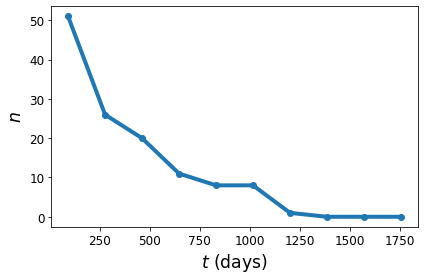

In [7]:
plt.plot(t_OS, p_OS, '-o')
plt.xlabel('$t$ (days)')
plt.ylabel('$n$')

If patients decay exponentially
$$N(t) = N_0 \exp\left(-\frac{t}{\tau}\ln 2\right) ,$$
then the half life can be determined from the slope
$$
\ln[N(t)] = -\frac{\ln 2}{\tau} t + \ln N_0.
$$


Fit line to the data

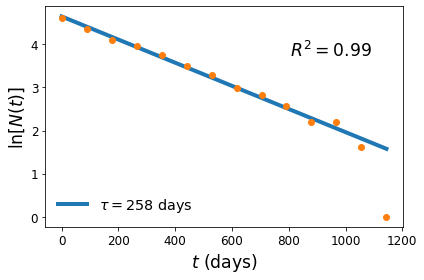

In [8]:
# The last datum is an outlier.
outliers = [len(p_OS_cum) - 1]
view_as_exponential(t_OS_cum, p_OS_cum, outlier_indices=outliers)

# Progression free survival

In [9]:
(t_PFS, p_PFS), (t_PFS_cum, p_PFS_cum) = survival_histograms(y['PFS_days'])

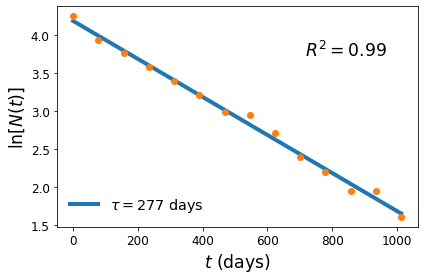

In [10]:
view_as_exponential(t_PFS_cum, p_PFS_cum)

In [24]:
ps = pipelines(MultiTaskElasticNet, VotingEstimator=None)

In [29]:
Y_train = np.log(y_train[['OS_days', 'PFS_days']])
Y_test = np.log(y_test[['OS_days', 'PFS_days']])
# Y_train = y_train[['OS_days', 'PFS_days']]
# Y_test = y_test[['OS_days', 'PFS_days']]

# rmse = lambda a, b: mean_squared_error(a, b, multioutput='raw_values')**0.5
rmse = lambda a, b: mean_squared_error(np.exp(a), np.exp(b), multioutput='raw_values')**0.5
benchmark_pipelines({'bla': ps}, X_train, Y_train, X_test, Y_test, metric=rmse)

,Freeman_test,Julian_test,Richard_test
bla,"[279.74023142566193, 296.4768389833383]","[282.2369780258766, 298.5516487844678]","[279.74023142566193, 296.4768389833383]"
